# 算法原理

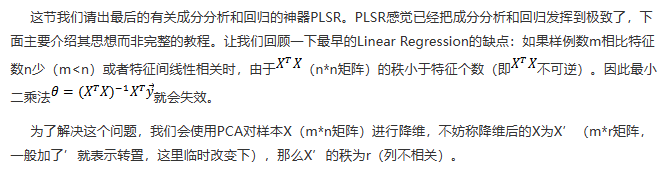

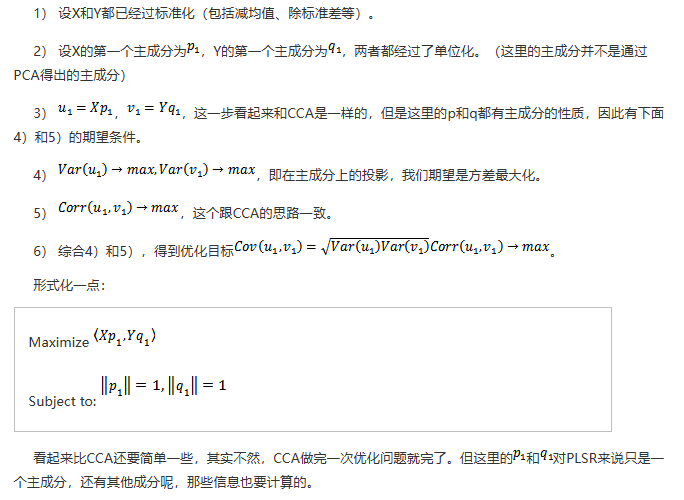

# 数据准备

这个数据集取自卡耐基梅隆大学的StatLi图书馆。这份统计数据是从1987的《棒球百科全书》得到，记录了1986和1987年两个赛季的数据，共包含322个观测样本，以及20个变量。后面我们将利用变量筛选的方法对其进行变量选择。

- 数据分析  
我们以Salary作为自变量，其余19个变量（AtBat, Hits, HmRun, Runs, RBI, Walks, Years, CAtBat, CHits, CHmRun, CRuns, CRBI, CWalks, League, Division, PutOuts, Assists, Errors, NewLeague）作为因变量分别使用下述方法进行变量筛选：

- 最优子集选择:  
通过最优子集筛选，筛选出的变量为：
AtBat, Hits, Walks, CHmRun, CRuns, CWalks, DivisionW, PutOuts

In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#读取数据
data = pd.read_csv("../data/Hitters.csv")
print(data.head())

   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29      14      A        E      446       33      20     NaN         A  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5         N  


In [2]:
#Salary里有缺失值，直接将所在行删掉
data = data.dropna()

#将非数字特征变为以0，1替代的特征
dms = pd.get_dummies(data[['League','Division','NewLeague']])

#准备数据
y = data['Salary']
x_ = data.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
x = pd.concat([x_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)

# 训练集、测试集划分
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state= 42)

# 模型训练

In [5]:
#回归模型、参数
model = PLSRegression(scale=True)
param_grid = {'n_components': range(1, 20)}

#GridSearchCV优化参数、训练模型
gsearch = GridSearchCV(pls_model_setup, param_grid)
model = gsearch.fit(x_train, y_train)

#打印 coef
print('Partial Least Squares Regression coefficients:',pls_model.best_estimator_.coef_)

Partial Least Squares Regression coefficients: [[ 35.32916493  48.83425857  18.50240933  39.28117603  30.59952998
   40.03398345  16.85990516  28.22289896  32.73784993  22.00875744
   33.60903032  30.39402522  25.73279799  54.98835148   6.56590871
   -0.90894359  17.60903423 -37.24246339  14.69680385]]


# 模型保存

In [6]:
# 法一
import joblib

# 保存模型
joblib.dump(model, '../outputs/best_models/plsr.pkl')

# 加载模型
model = joblib.load('../outputs/best_models/plsr.pkl')

In [7]:
# 法二
import pickle

with open('../outputs/best_models/plsr.pkl', 'wb') as f:
    pickle.dump(model, f)

#读取Model
with open('../outputs/best_models/plsr.pkl', 'rb') as f:
    model = pickle.load(f)

# 模型预测

In [10]:
#对测试集做预测
prediction = model.predict(x_test)

#计算R2，均方差
r2 = r2_score(y_test, prediction)
mse = np.sqrt(mean_squared_error(y_test, prediction))

In [11]:
print("R2为：", r2)
print("MSE为：", mse)

R2为： 0.2678940112232917
MSE为： 398.09956327448526
